In [19]:
!pip install pmdarima

In [20]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [21]:
data = pd.read_csv('/content/drive/MyDrive/PROJECT/Dataset/train.csv')

In [22]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [23]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
sorted_date = data['Order Date'].sort_values()
print(sorted_date)

7980   2015-01-03
741    2015-01-04
740    2015-01-04
739    2015-01-04
1759   2015-01-05
          ...    
1297   2018-12-30
906    2018-12-30
645    2018-12-30
908    2018-12-30
5091   2018-12-30
Name: Order Date, Length: 9800, dtype: datetime64[ns]


In [27]:
sales_by_category = data.groupby(["Category", data["Order Date"].dt.year])["Sales"].sum().reset_index()
forcasted_sales = pd.DataFrame(columns=["Category", "Forcasted_sales_2019"])
result = []

for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    sales_series = category_data.set_index("Order Date")["Sales"]

    train_data, valid_data = train_test_split(sales_series, test_size=0.2, random_state=42, shuffle=False)

    model = auto_arima(train_data,
                       seasonal=True,
                       suppress_warnings=True,
                       stepwise=True)
    forecast = model.predict(n_periods=1)

    forcasted_sales = pd.concat([forcasted_sales, pd.DataFrame({
        "Category": category,
        "Forcasted_sales_2019": forecast
    })], ignore_index=True)

    true_values = valid_data
    predicted_values = model.predict(n_periods=len(valid_data))
    mae = mean_absolute_error(true_values, predicted_values)
    residuals = true_values - predicted_values
    result.append({
        "Category": category,
        'True Values': true_values.values,
        'Predicted Values': predicted_values.values,
        "MAE": mae,
        "Residuals": residuals.values  #Positive value means model underpredicted, Negative value means model overpredicted
    })
    for i in result:
        print(f"Category: {i['Category']}")
        print(f"True Values: {i['True Values']}")
        print(f"Predicted Values: {i['Predicted Values']}")
        print(f"MAE: {i['MAE']}")
        print(f"Residuals: {i['Residuals']}")
        print()

forcasted_sales["Forcasted_sales_2019"] = forcasted_sales["Forcasted_sales_2019"].apply(lambda x: '{:,.2f}'.format(x))
print("Forcasted Sales in 2019 for Each Product Category")
print(forcasted_sales)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Category: Furniture
True Values: [212313.7872]
Predicted Values: [172114.9295]
MAE: 40198.85769999999
Residuals: [nan nan]



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Category: Furniture
True Values: [212313.7872]
Predicted Values: [172114.9295]
MAE: 40198.85769999999
Residuals: [nan nan]

Category: Office Supplies
True Values: [240367.541]
Predicted Values: [155018.26433333]
MAE: 85349.27666666664
Residuals: [nan nan]

Category: Furniture
True Values: [212313.7872]
Predicted Values: [172114.9295]
MAE: 40198.85769999999
Residuals: [nan nan]

Category: Office Supplies
True Values: [240367.541]
Predicted Values: [155018.26433333]
MAE: 85349.27666666664
Residuals: [nan nan]

Category: Technology
True Values: [269370.691]
Predicted Values: [186028.394]
MAE: 83342.29699999996
Residuals: [nan nan]

Forcasted Sales in 2019 for Each Product Category
          Category Forcasted_sales_2019
0        Furniture           172,114.93
1  Office Supplies           155,018.26
2       Technology           186,028.39


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


##Using ARIMA Manually

In [ ]:
!pip install -U statsmodels

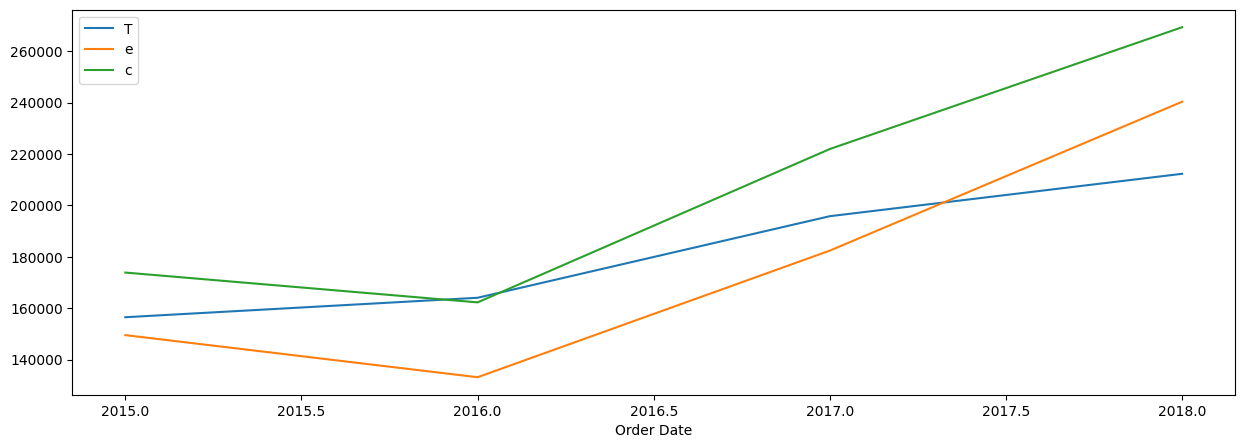

In [ ]:
for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    sales_series = category_data.set_index("Order Date")["Sales"]
    sales_series.plot(figsize = (15,5));
    plt.legend(category)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

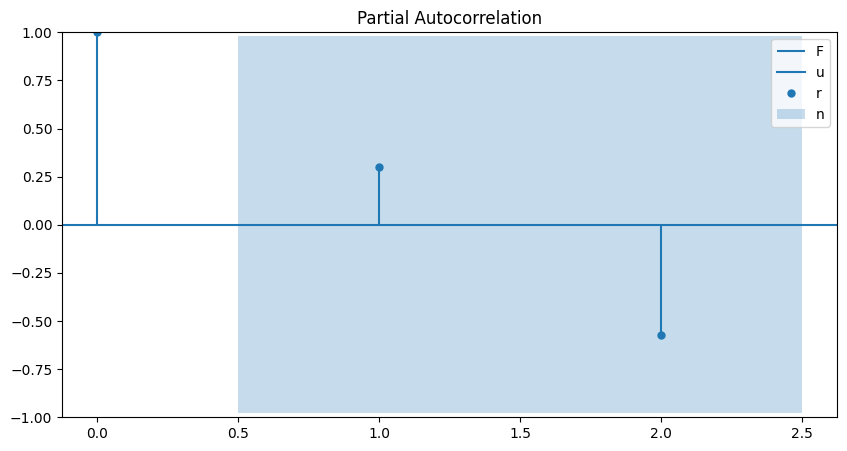

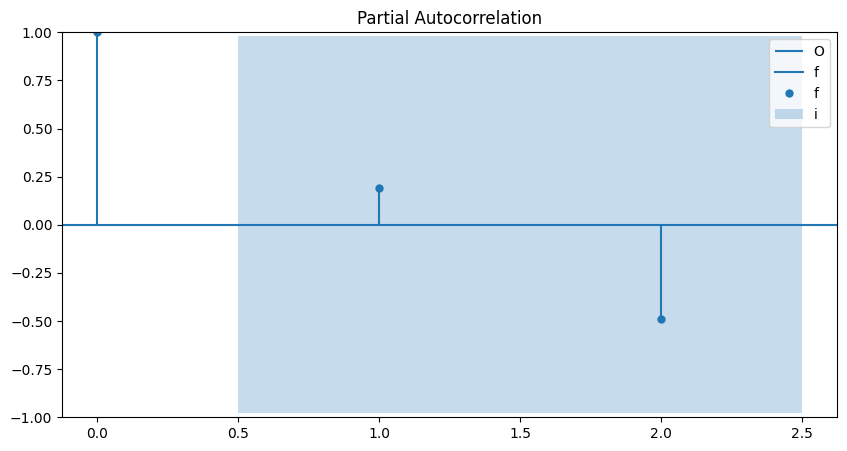

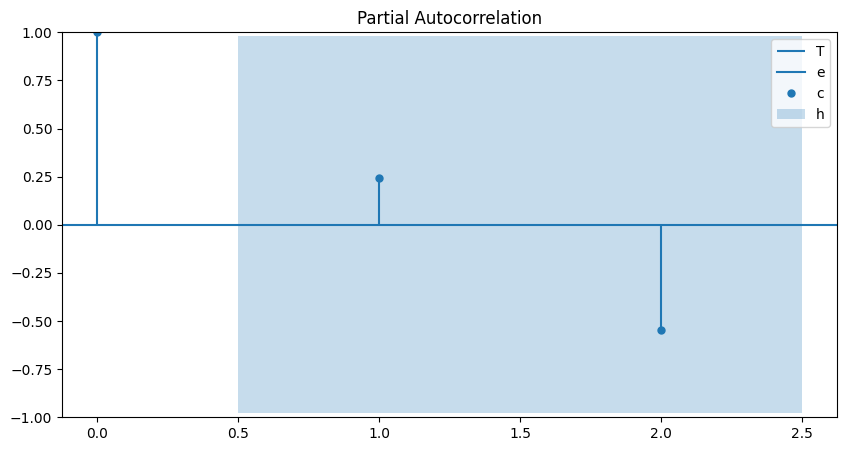

In [ ]:
for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    sales_series = category_data.set_index("Order Date")["Sales"]
    fig, ax = plt.subplots(figsize=(10,5))
    plot_pacf(sales_series, ax=ax);
    plt.legend(category)

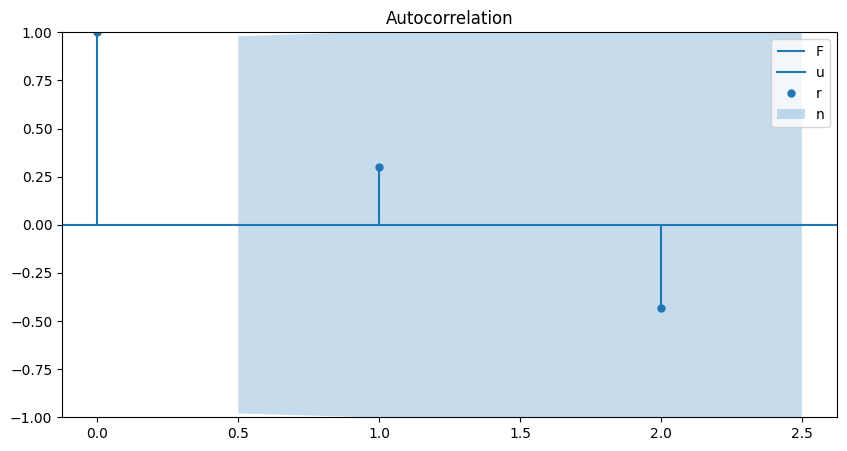

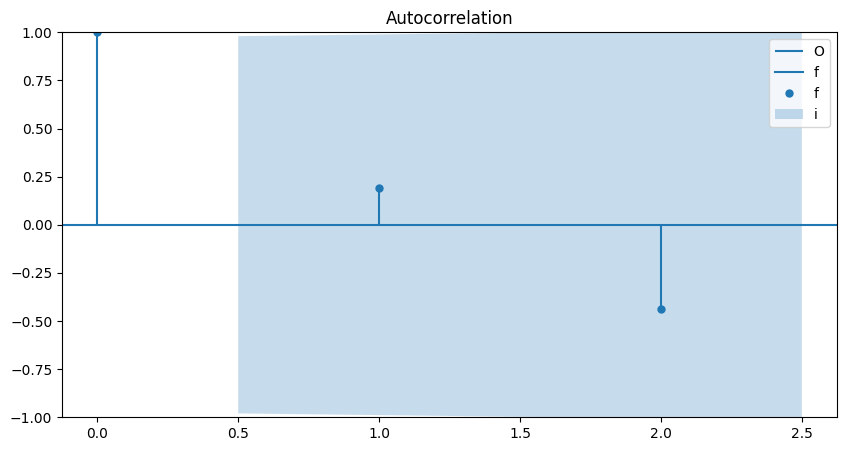

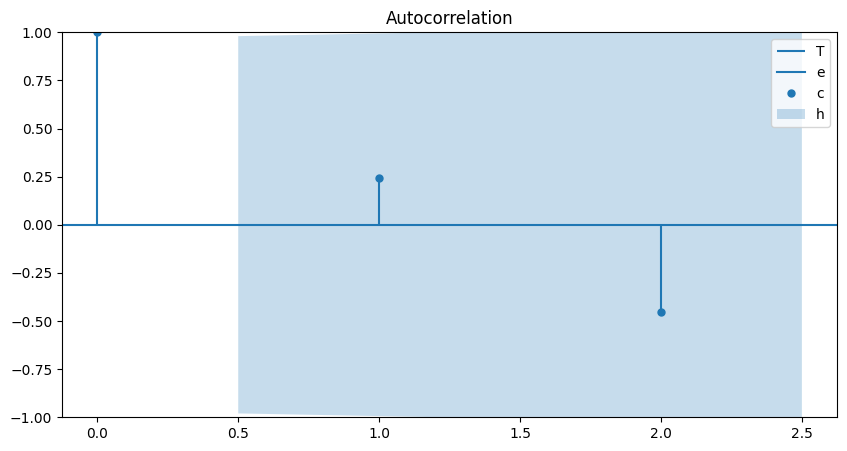

In [ ]:
for category in sales_by_category["Category"].unique():
    category_data = sales_by_category[sales_by_category["Category"] == category]
    sales_series = category_data.set_index("Order Date")["Sales"]
    fig, ax = plt.subplots(figsize=(10,5))
    plot_acf(sales_series, ax=ax);
    plt.legend(category)

In [ ]:
sales_by_category_manual = data.groupby(["Category", data["Order Date"].dt.year])["Sales"].sum().reset_index()
forcasted_sales_manual = pd.DataFrame(columns=["Category", "Forcasted_sales_2019"])

for category in sales_by_category_manual["Category"].unique():
    category_data = sales_by_category_manual[sales_by_category_manual["Category"] == category]
    sales_series = category_data.set_index("Order Date")["Sales"]

    model = ARIMA(sales_series, order=(0,0,0))
    arima_result = model.fit()
    prediction_result = arima_result.get_forecast(Ntest=1)
    forecast = prediction_result.predicted_mean

    forcasted_sales_manual = pd.concat([forcasted_sales_manual, pd.DataFrame({
        "Category": category,
        "Forcasted_sales_2019": forecast
    })], ignore_index=True)

forcasted_sales_manual["Forcasted_sales_2019"] = forcasted_sales_manual["Forcasted_sales_2019"].apply(lambda x: '{:,.2f}'.format(x))
print("Forcasted Sales in 2019 for Each Product Category using Manual ARIMA")
print(forcasted_sales_manual)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

Forcasted Sales in 2019 for Each Product Category using Manual ARIMA
          Category Forcasted_sales_2019
0        Furniture           182,164.41
1  Office Supplies           176,355.58
2       Technology           206,863.97
